<a href="https://colab.research.google.com/github/MiaKuntz/machine_learning_2/blob/main/ML4BI_E5_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## Deep Learning exercises for week 6

In this exercise, you will expand last weeks exercise by training pre-trained model

**About the CIFAR-10 dataset**

The CIFAR-10 dataset is a widely-used dataset for benchmarking machine learning algorithms, especially in the field of image recognition. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images. The classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each image is labeled with one of these 10 classes, making it a standard dataset for evaluating algorithms for image classification tasks.

The CIFAR-10 dataset was created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton and is a subset of the 80 million tiny images dataset. Due to its moderate size and complexity, CIFAR-10 serves as an excellent benchmark for algorithms and techniques in computer vision, particularly for methodologies that are aimed at performing well on small to medium-sized datasets in image recognition tasks.

**Load and prepare the data**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Class names in the CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 6s 0us/step


**Plot images**

Plot some images from the dataset.

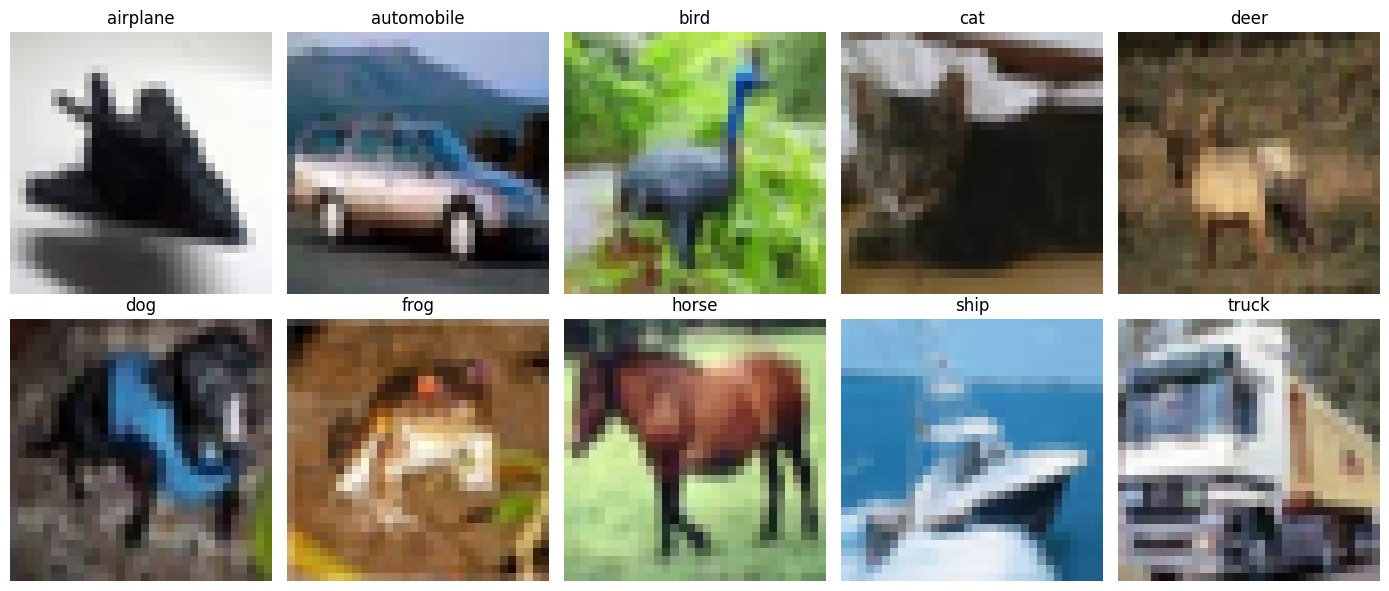

In [ ]:
import numpy as np

# Initialize a plot with 1 row and 10 columns
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
axes = axes.ravel()

# Plot one image from each class
for i in range(10):
    # Find the index of the first image of each class
    index = np.where(train_labels.flatten() == i)[0][0]
    img = train_images[index]

    # Plot the image
    axes[i].imshow(img, cmap=plt.cm.binary)
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Model building**

Build a convnet without adding data augmentation.

In [ ]:
inputs = tf.keras.Input(shape=(32, 32, 3))  # Input layer

# Normalization layer
x = layers.Rescaling(1./255)(inputs)

# First Convolutional Block
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Second Convolutional Block
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Third Convolutional Block
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten and Dense Layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)  # 10 classes in CIFAR-10

# Model creation
model = models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                        

**Compile and train the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(train_images, train_labels, epochs=50,
                    validation_split=0.2, batch_size=256,
                    callbacks = callbacks)

Epoch 1/50
157/157 [==============================] - 6s 9ms/step - loss: 1.8130 - accuracy: 0.3363 - val_loss: 1.5824 - val_accuracy: 0.4302
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 1.4525 - accuracy: 0.4807 - val_loss: 1.4204 - val_accuracy: 0.4869
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 1.3164 - accuracy: 0.5293 - val_loss: 1.2910 - val_accuracy: 0.5443
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 1.2213 - accuracy: 0.5714 - val_loss: 1.2708 - val_accuracy: 0.5570
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 1.1395 - accuracy: 0.5993 - val_loss: 1.1364 - val_accuracy: 0.6022
Epoch 6/50
157/157 [==============================] - 1s 6ms/step - loss: 1.0820 - accuracy: 0.6204 - val_loss: 1.1251 - val_accuracy: 0.6061
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 1.0257 - accuracy: 0.6425 - val_loss: 1.0458 - val_accuracy: 0.6363
Epoch 

**Plotting Training and Validation Loss and Accuracy**

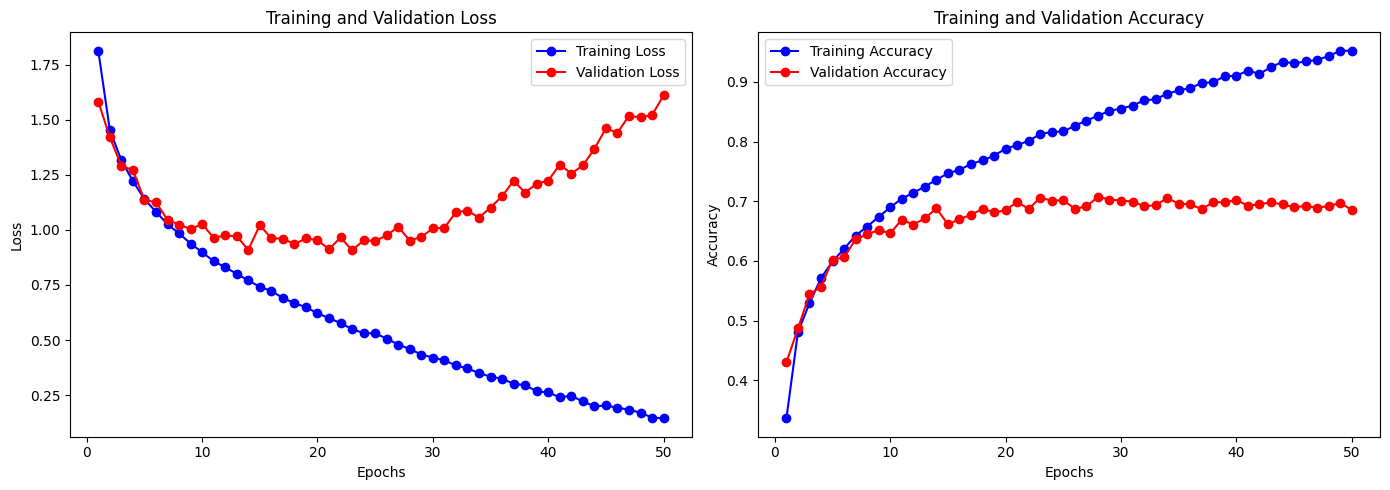

In [ ]:
# Assuming 'history' is the return value from model.fit()
history_dict = history.history

# Extracting loss and accuracy history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()

**Test data evaluation**

In [ ]:
best_model = keras.models.load_model("convnet_from_scratch.keras")

test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.9154 - accuracy: 0.6983
Test accuracy: 0.6983000040054321


## Data augmentation addition

Now, add a data augmentation step and compare model performance.

**Model building**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(32, 32, 3))

# Applying augmentation on the inputs
x = data_augmentation(inputs)

# Normalization layer
x = layers.Rescaling(1./255)(x)

# Convolutional blocks and rest of the model
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                           

**Compile and train the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="aug_convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(train_images, train_labels, epochs=100,
                    validation_split=0.2, batch_size=256,
                    callbacks = callbacks, verbose=0)

**Plotting Training and Validation Loss and Accuracy**

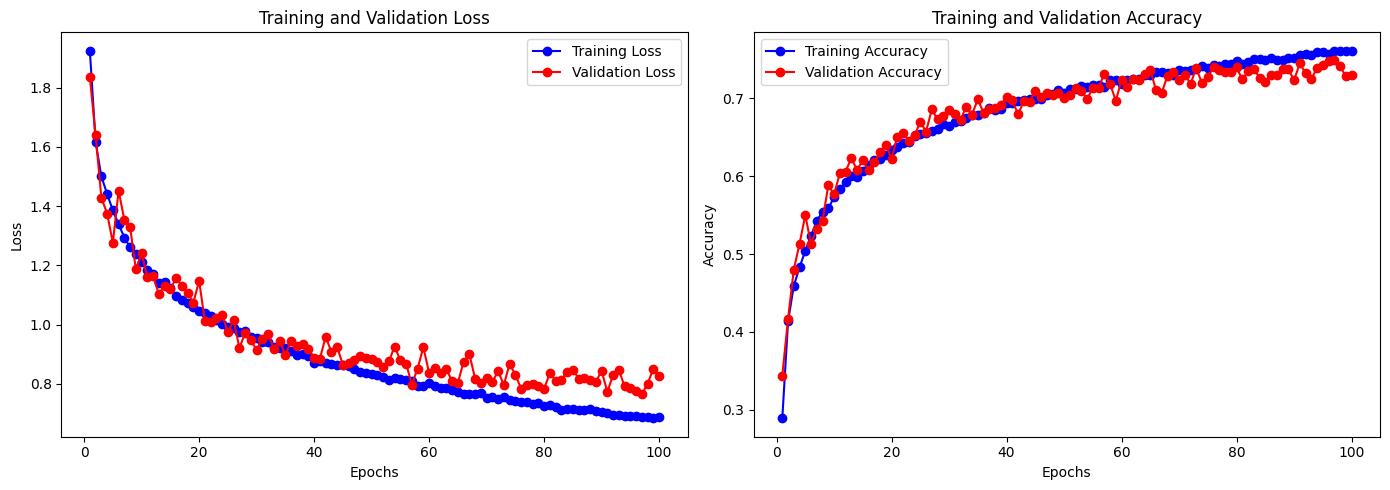

In [ ]:
# Assuming 'history' is the return value from model.fit()
history_dict = history.history

# Extracting loss and accuracy history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()

In [ ]:
def print_best_val_loss_and_accuracy(history):
    history_dict = history.history

    # Find the index of the best validation loss
    best_val_loss_index = np.argmin(history_dict['val_loss'])

    # Retrieve the best validation loss
    best_val_loss = history_dict['val_loss'][best_val_loss_index]

    # Retrieve the validation accuracy corresponding to the best validation loss
    best_val_accuracy = history_dict['val_accuracy'][best_val_loss_index]

    print(f"Best Validation Loss: {best_val_loss}")
    print(f"Validation Accuracy at Best Loss: {best_val_accuracy}")

In [ ]:
print_best_val_loss_and_accuracy(history)

Best Validation Loss: 0.7647018432617188
Validation Accuracy at Best Loss: 0.7497000098228455


In [ ]:
best_model = keras.models.load_model("aug_convnet_from_scratch.keras")

test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.7799 - accuracy: 0.7431
Test accuracy: 0.7430999875068665


## Experiment with more data augmentation
Try experimenting with adding more data augmentation techniques

In [ ]:
# Enhanced data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.1),  # Adjusts the contrast
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Translates the image
        # Potentially add more augmentation techniques here
    ]
)

inputs = keras.Input(shape=(32, 32, 3))

# Applying enhanced augmentation on the inputs
x = data_augmentation(inputs)

# Continue with normalization and the rest of your model
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="more_aug_convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(train_images, train_labels, epochs=100,
                    validation_split=0.2, batch_size=256,
                    callbacks = callbacks)

Epoch 1/100
157/157 [==============================] - 4s 9ms/step - loss: 1.9314 - accuracy: 0.2862 - val_loss: 1.6308 - val_accuracy: 0.4076
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 1.6600 - accuracy: 0.3984 - val_loss: 1.5745 - val_accuracy: 0.4246
Epoch 3/100
157/157 [==============================] - 1s 7ms/step - loss: 1.5656 - accuracy: 0.4332 - val_loss: 1.6197 - val_accuracy: 0.4332
Epoch 4/100
157/157 [==============================] - 1s 8ms/step - loss: 1.4998 - accuracy: 0.4578 - val_loss: 1.3511 - val_accuracy: 0.5161
Epoch 5/100
157/157 [==============================] - 1s 7ms/step - loss: 1.4496 - accuracy: 0.4829 - val_loss: 1.4215 - val_accuracy: 0.5145
Epoch 6/100
157/157 [==============================] - 1s 7ms/step - loss: 1.4104 - accuracy: 0.4951 - val_loss: 1.3902 - val_accuracy: 0.5224
Epoch 7/100
157/157 [==============================] - 1s 7ms/step - loss: 1.3735 - accuracy: 0.5103 - val_loss: 1.3003 - val_accuracy: 0.5511

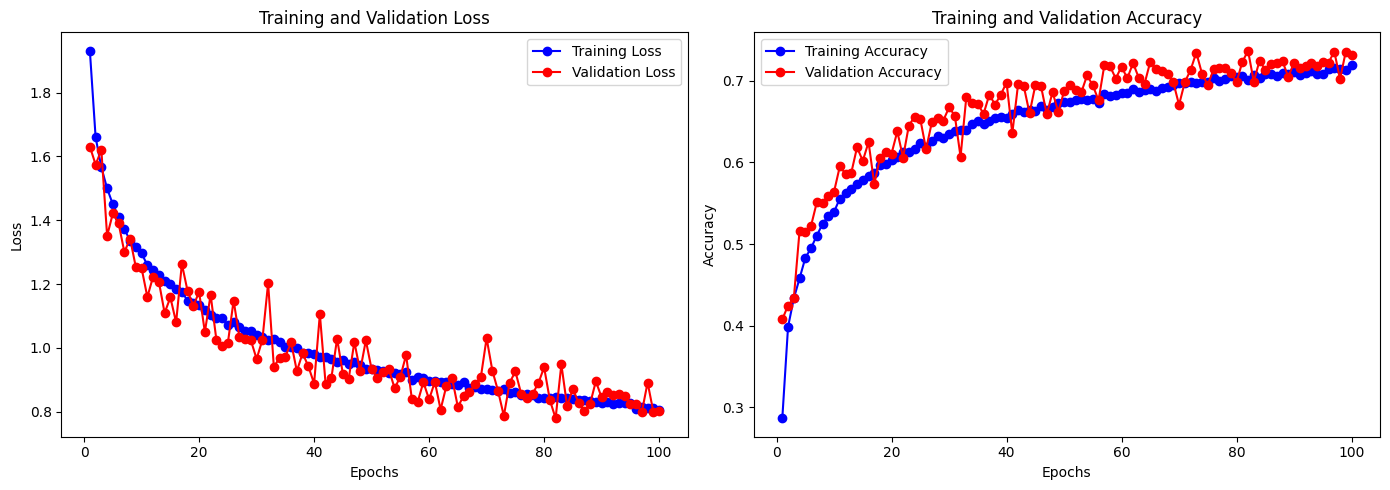

In [ ]:
# Assuming 'history' is the return value from model.fit()
history_dict = history.history

# Extracting loss and accuracy history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()

In [ ]:
print_best_val_loss_and_accuracy(history)

Best Validation Loss: 0.7791651487350464
Validation Accuracy at Best Loss: 0.7371000051498413


In [ ]:
best_model = keras.models.load_model("more_aug_convnet_from_scratch.keras")

test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.7758 - accuracy: 0.7340
Test accuracy: 0.734000027179718


## What's next?

To further increase the performance of our model, we could make some tweaks here and there, like icreasing the number of filters in the convolutional layers can help the model learn more complex features. Similarly, adjusting the number of neurons in the dense layers might improve learning capacity.

However, at this stage, gains from such changes are likely going to marginal.

Instead, there are two things that would likely boost performance:

1) More and better data! The data is greatly pixilated. Higher resolution data would allow us to build deeper models that generalize better.

2) More and better tricks! Next in the course, we'll learn about advanced computer vision techniques that can push performance even further.